In [160]:

# Timedelta function demonstration 
  
from datetime import datetime, timedelta
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Puedes ignorar desde aquí

### Import data 

In [162]:
df = pd.read_csv('/home/javi/Nextcloud/Universidad/Master/TFM/ST_analysis/upmsat.csv')

## Format *time_received* field

In [163]:
df.time_received = np.array([pd.to_datetime(date, format="%Y/%m/%d %H:%M") for date in df.time_received])

type(df.time_received[0])
df = df[:8416] # Dejo hasta la separacion de un mes (25/05/2021)


## Detect for rows with same *time_recieved* and compute the mean of the *batt_tbat1_tm* values, leaving only one row 

In [164]:
before_time = None

acum_values = []
acum_index = []
index = 0
df_new = df
index_to_remove = []
averages = []
debug = False
field = "batt_tbat1_tm"
for time in df.time_received:
    if before_time == pd.to_datetime('2020-10-03 11:31:56', format="%Y/%m/%d %H:%M"):
        debug = True
    if time == before_time:
        acum_values.append(df[field][index-1])
        acum_index.append(index-1)
        if debug:
            print(acum_values)
            print(df[field][index-1])

    elif len(acum_values) != 0:

        acum_values.append(df[field][index-1])
        acum_index.append(index-1)
        if debug:
            print(acum_values)
        averages.append(np.average(acum_values))

        index_to_remove.append(acum_index)
        
        acum_index = []
        acum_values = []
    else:
        before_time = time
    debug = False
    index+=1
#df_new[field][acum_index[0]] = np.average(acum_values)    
#df_new = df_new.drop(df_new.index [ acum_index[1:] ])
average_index = 0
new_indexes = []
print(averages)
print(index_to_remove)
for chunk in index_to_remove:
    df_new[field][chunk[0]] = int(averages[average_index])
    average_index += 1
chunk = [i for j in index_to_remove for i in j[1:]]
df_new = df_new.drop(df_new.index [ chunk ])


df = df_new.reset_index()

[1645.0, 1651.0, 1630.5]
[[6212, 6213], [6906, 6907], [7791, 7792]]


/tmp/ipykernel_5710/2952043565.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[field][chunk[0]] = int(averages[average_index])


ValueError: cannot insert level_0, already exists

In [157]:
df.to_csv('/home/javi/Nextcloud/Universidad/Master/TFM/ST_analysis/upmsat.csv')

# Hasta aquí

## Import data 

In [165]:
df = pd.read_csv('/home/javi/Nextcloud/Universidad/Master/TFM/ST_analysis/upmsat.csv')

In [166]:
df.time_received = np.array([pd.to_datetime(date, format="%Y/%m/%d %H:%M") for date in df.time_received])


## Divide the df in chunks of time, the length of this chunks is, at least, 6 hours 

In [167]:
chunks = []
time_delta = None
chunk_index = -1
first_time = None
separation_hours = 6
for time in df.time_received:
    if first_time != None and first_time <= time <= end_time:
        chunks[chunk_index].append(time)
    else:
        first_time = time
        chunks.append([first_time])
        end_time = first_time + timedelta(hours=separation_hours)
        chunk_index += 1
        

##  To get an idea of the length of the chunks

In [168]:
for chunk in chunks:
    
    delta = chunk[len(chunk)-1] - chunk[0]
    if delta > timedelta(hours = 3):
        print(delta)

0 days 03:14:20
0 days 03:14:01
0 days 03:13:00
0 days 03:12:20
0 days 03:11:00
0 days 03:15:21
0 days 03:13:40
0 days 03:15:00
0 days 03:13:40
0 days 03:12:40
0 days 03:14:20
0 days 03:12:00
0 days 03:14:01
0 days 03:07:40
0 days 03:09:20
0 days 03:10:00
0 days 03:12:00
0 days 03:11:39
0 days 03:14:21
0 days 03:12:00
0 days 03:11:59
0 days 03:12:20
0 days 03:12:40
0 days 03:12:00
0 days 03:14:00
0 days 03:12:40
0 days 03:14:40
0 days 03:11:00
0 days 03:13:38
0 days 03:11:40
0 days 03:14:00
0 days 03:13:00
0 days 03:15:00
0 days 03:13:40
0 days 03:11:00
0 days 03:14:00
0 days 03:12:00
0 days 03:15:20
0 days 03:14:40
0 days 03:14:00
0 days 03:10:40
0 days 03:14:00
0 days 03:12:20
0 days 03:15:19
0 days 03:12:40
0 days 03:14:00
0 days 03:14:41
0 days 03:12:20
0 days 03:11:00
0 days 03:14:20
0 days 03:09:00
0 days 03:12:19
0 days 03:11:40
0 days 03:15:21
0 days 03:14:00
0 days 03:12:59
0 days 03:13:00
0 days 03:14:41
0 days 03:13:20
0 days 03:13:40
0 days 03:14:20
0 days 03:13:00
0 days 0

## Separate the values of *batt_tbat1_tm* in the same way

In [169]:
#print(df.loc[df.time_received == chunks[0][1]].index[0])
values = []
field = "batt_tbat1_tm"
indexes = [i for i in range(0, len(chunks))]
for chunk, index in zip(chunks, indexes):
    values.append([])
    for time in chunk:
        value_index = df.loc[df.time_received == time].index[0]
        values[index].append(df[field][value_index])


Index: 0
0
[1653]
1
[1653, 1652]
2
[1653, 1652, 1653]
3
[1653, 1652, 1653, 1653]
4
[1653, 1652, 1653, 1653, 1654]
5
[1653, 1652, 1653, 1653, 1654, 1655]
6
[1653, 1652, 1653, 1653, 1654, 1655, 1655]
7
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656]
8
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655]
9
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642]
10
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643]
11
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643, 1644]
12
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643, 1644, 1644]
13
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643, 1644, 1644, 1645]
14
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643, 1644, 1644, 1645, 1646]
15
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643, 1644, 1644, 1645, 1646, 1647]
16
[1653, 1652, 1653, 1653, 1654, 1655, 1655, 1656, 1655, 1642, 1643, 1644, 1644, 1645, 1646, 1647, 1646]
17
[1653, 1652,

203
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658]
204
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659]
205
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660]
206
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660, 1660]
207
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660, 1660, 1661]
208
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660, 1660, 1661, 1661]
209
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660, 1660, 1661, 1661, 1661]
210
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660, 1660, 1661, 1661, 1661, 1662]
211
[1674, 1675, 1675, 1674, 1675, 1676, 1675, 1676, 1677, 1677, 1677, 1679, 1658, 1658, 1659, 1660, 1660, 1661, 1661, 1

414
[1655]
415
[1655, 1655]
416
[1655, 1655, 1655]
417
[1655, 1655, 1655, 1652]
418
[1655, 1655, 1655, 1652, 1652]
419
[1655, 1655, 1655, 1652, 1652, 1654]
420
[1655, 1655, 1655, 1652, 1652, 1654, 1652]
421
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652]
422
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652]
423
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654]
424
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653]
425
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653, 1654]
426
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653, 1654, 1655]
427
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653, 1654, 1655, 1656]
428
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653, 1654, 1655, 1656, 1655]
429
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653, 1654, 1655, 1656, 1655, 1646]
430
[1655, 1655, 1655, 1652, 1652, 1654, 1652, 1652, 1652, 1654, 1653, 1654, 1655, 1656, 1655, 1646, 164

651
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654]
652
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655]
653
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654]
654
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654, 1656]
655
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654, 1656, 1664]
656
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654, 1656, 1664, 1663]
657
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654, 1656, 1664, 1663, 1664]
658
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654, 1656, 1664, 1663, 1664, 1664]
659
[1642, 1643, 1643, 1644, 1645, 1651, 1650, 1651, 1652, 1652, 1652, 1652, 1654, 1655, 1654, 1656, 1664, 1663, 1664, 1664, 1665]
660
[1642, 1643, 1643, 1644, 1645, 16

882
[1602]
883
[1602, 1603]
884
[1602, 1603, 1604]
885
[1602, 1603, 1604, 1605]
886
[1602, 1603, 1604, 1605, 1605]
887
[1602, 1603, 1604, 1605, 1605, 1605]
888
[1602, 1603, 1604, 1605, 1605, 1605, 1605]
889
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604]
890
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606]
891
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606]
892
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618]
893
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619]
894
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619, 1619]
895
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619, 1619, 1620]
896
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619, 1619, 1620, 1620]
897
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619, 1619, 1620, 1620, 1624]
898
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619, 1619, 1620, 1620, 1624, 162

1095
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624]
1096
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625]
1097
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625]
1098
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625, 1625]
1099
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625, 1625, 1625]
1100
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625, 1625, 1625, 1627]
1101
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625, 1625, 1625, 1627, 1627]
1102
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625, 1625, 1625, 1627, 1627, 1628]
1103
[1635, 1635, 1636, 1636, 1635, 1636, 1638, 1637, 1638, 1637, 1624, 1625, 1624, 1625, 1625, 1625, 1625, 1627, 1627, 1628, 1628]
Index: 52
1104
[1642]
1105
[

1308
[1648, 1647, 1648, 1649, 1649, 1649, 1650, 1649, 1648, 1650, 1651, 1646, 1645, 1646, 1646, 1645, 1646, 1645, 1646]
1309
[1648, 1647, 1648, 1649, 1649, 1649, 1650, 1649, 1648, 1650, 1651, 1646, 1645, 1646, 1646, 1645, 1646, 1645, 1646, 1647]
1310
[1648, 1647, 1648, 1649, 1649, 1649, 1650, 1649, 1648, 1650, 1651, 1646, 1645, 1646, 1646, 1645, 1646, 1645, 1646, 1647, 1648]
1311
[1648, 1647, 1648, 1649, 1649, 1649, 1650, 1649, 1648, 1650, 1651, 1646, 1645, 1646, 1646, 1645, 1646, 1645, 1646, 1647, 1648, 1647]
Index: 63
1312
[1678]
1313
[1678, 1679]
1314
[1678, 1679, 1680]
1315
[1678, 1679, 1680, 1680]
1316
[1678, 1679, 1680, 1680, 1681]
1317
[1678, 1679, 1680, 1680, 1681, 1682]
1318
[1678, 1679, 1680, 1680, 1681, 1682, 1684]
1319
[1678, 1679, 1680, 1680, 1681, 1682, 1684, 1684]
1320
[1678, 1679, 1680, 1680, 1681, 1682, 1684, 1684, 1684]
1321
[1678, 1679, 1680, 1680, 1681, 1682, 1684, 1684, 1684, 1685]
1322
[1678, 1679, 1680, 1680, 1681, 1682, 1684, 1684, 1684, 1685, 1685]
1323
[1678, 

1441
[1651, 1652, 1651, 1650]
1442
[1651, 1652, 1651, 1650, 1649]
1443
[1651, 1652, 1651, 1650, 1649, 1648]
1444
[1651, 1652, 1651, 1650, 1649, 1648, 1647]
1445
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634]
1446
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636]
1447
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640]
1448
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643]
1449
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643, 1645]
1450
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643, 1645, 1648]
1451
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643, 1645, 1648, 1650]
1452
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643, 1645, 1648, 1650, 1651]
1453
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643, 1645, 1648, 1650, 1651, 1652]
1454
[1651, 1652, 1651, 1650, 1649, 1648, 1647, 1634, 1636, 1640, 1643, 1645, 1648, 1650, 1651, 1652, 1653]
1455
[1651, 1652, 1651, 1650, 1649

1587
[1613, 1612, 1613, 1615, 1616, 1616, 1617, 1618, 1619, 1619, 1620, 1619, 1620, 1621, 1621, 1621, 1623]
1588
[1613, 1612, 1613, 1615, 1616, 1616, 1617, 1618, 1619, 1619, 1620, 1619, 1620, 1621, 1621, 1621, 1623, 1624]
1589
[1613, 1612, 1613, 1615, 1616, 1616, 1617, 1618, 1619, 1619, 1620, 1619, 1620, 1621, 1621, 1621, 1623, 1624, 1624]
1590
[1613, 1612, 1613, 1615, 1616, 1616, 1617, 1618, 1619, 1619, 1620, 1619, 1620, 1621, 1621, 1621, 1623, 1624, 1624, 1626]
1591
[1613, 1612, 1613, 1615, 1616, 1616, 1617, 1618, 1619, 1619, 1620, 1619, 1620, 1621, 1621, 1621, 1623, 1624, 1624, 1626, 1627]
Index: 76
1592
[1667]
1593
[1667, 1665]
1594
[1667, 1665, 1666]
1595
[1667, 1665, 1666, 1665]
1596
[1667, 1665, 1666, 1665, 1666]
1597
[1667, 1665, 1666, 1665, 1666, 1666]
1598
[1667, 1665, 1666, 1665, 1666, 1666, 1666]
1599
[1667, 1665, 1666, 1665, 1666, 1666, 1666, 1666]
1600
[1667, 1665, 1666, 1665, 1666, 1666, 1666, 1666, 1667]
1601
[1667, 1665, 1666, 1665, 1666, 1666, 1666, 1666, 1667, 1667]


1707
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645]
1708
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645]
1709
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646]
1710
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647]
1711
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647, 1647]
1712
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647, 1647, 1648]
1713
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647, 1647, 1648, 1649]
1714
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647, 1647, 1648, 1649, 1649]
1715
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647, 1647, 1648, 1649, 1649, 1650]
1716
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645, 1646, 1647, 1647, 1648, 1649, 1649, 1650, 1652]
1717
[1652, 1651, 1651, 1653, 1653, 1654, 1654, 1655, 1656, 1645, 1645

1871
[1627, 1627, 1629, 1631, 1634, 1636, 1637]
1872
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639]
1873
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641]
1874
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644]
1875
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646]
1876
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623]
1877
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623, 1625]
1878
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623, 1625, 1626]
1879
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623, 1625, 1626, 1628]
1880
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623, 1625, 1626, 1628, 1629]
1881
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623, 1625, 1626, 1628, 1629, 1632]
1882
[1627, 1627, 1629, 1631, 1634, 1636, 1637, 1639, 1641, 1644, 1646, 1623, 1625, 1626, 1628, 1629, 1632, 1634]
1883
[1627, 1627, 1629, 1631

2163
[1658, 1657, 1656, 1656]
2164
[1658, 1657, 1656, 1656, 1657]
2165
[1658, 1657, 1656, 1656, 1657, 1657]
2166
[1658, 1657, 1656, 1656, 1657, 1657, 1656]
2167
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656]
2168
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656]
2169
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660]
2170
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683]
2171
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683, 1683]
2172
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683, 1683, 1684]
2173
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683, 1683, 1684, 1682]
2174
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683, 1683, 1684, 1682, 1683]
2175
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683, 1683, 1684, 1682, 1683, 1684]
2176
[1658, 1657, 1656, 1656, 1657, 1657, 1656, 1656, 1656, 1660, 1683, 1683, 1684, 1682, 1683, 1684, 1684]
2177
[1658, 1657, 1656, 1656, 1657

2335
[1619, 1617, 1627, 1627]
2336
[1619, 1617, 1627, 1627, 1628]
2337
[1619, 1617, 1627, 1627, 1628, 1628]
2338
[1619, 1617, 1627, 1627, 1628, 1628, 1628]
2339
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629]
2340
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630]
2341
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629]
2342
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629, 1629]
2343
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629, 1629, 1630]
2344
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629, 1629, 1630, 1631]
2345
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629, 1629, 1630, 1631, 1631]
2346
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629, 1629, 1630, 1631, 1631, 1632]
2347
[1619, 1617, 1627, 1627, 1628, 1628, 1628, 1629, 1630, 1629, 1629, 1630, 1631, 1631, 1632, 1628]
Index: 112
2348
[1603]
2349
[1603, 1606]
2350
[1603, 1606, 1605]
2351
[1603, 1606, 1605, 1607]
2352
[1603, 1606, 1605, 1607, 1608]
2353
[1603,

2557
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604]
2558
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604]
2559
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604, 1607]
2560
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604, 1607, 1606]
2561
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604, 1607, 1606, 1608]
2562
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604, 1607, 1606, 1608, 1608]
2563
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604, 1607, 1606, 1608, 1608, 1610]
2564
[1614, 1616, 1615, 1619, 1620, 1605, 1607, 1607, 1610, 1611, 1613, 1614, 1615, 1616, 1619, 1604, 1604, 1607, 1606, 1608, 1608, 1610, 1611]
2565
[1614, 1616

2790
[1634, 1635, 1637, 1639, 1644, 1644, 1644, 1646, 1671, 1669, 1665, 1662, 1659, 1652, 1648, 1645, 1643, 1639]
2791
[1634, 1635, 1637, 1639, 1644, 1644, 1644, 1646, 1671, 1669, 1665, 1662, 1659, 1652, 1648, 1645, 1643, 1639, 1629]
2792
[1634, 1635, 1637, 1639, 1644, 1644, 1644, 1646, 1671, 1669, 1665, 1662, 1659, 1652, 1648, 1645, 1643, 1639, 1629, 1631]
Index: 134
2793
[1599]
2794
[1599, 1599]
2795
[1599, 1599, 1600]
2796
[1599, 1599, 1600, 1600]
2797
[1599, 1599, 1600, 1600, 1650]
2798
[1599, 1599, 1600, 1600, 1650, 1649]
2799
[1599, 1599, 1600, 1600, 1650, 1649, 1647]
2800
[1599, 1599, 1600, 1600, 1650, 1649, 1647, 1650]
2801
[1599, 1599, 1600, 1600, 1650, 1649, 1647, 1650, 1652]
2802
[1599, 1599, 1600, 1600, 1650, 1649, 1647, 1650, 1652, 1650]
2803
[1599, 1599, 1600, 1600, 1650, 1649, 1647, 1650, 1652, 1650, 1651]
2804
[1599, 1599, 1600, 1600, 1650, 1649, 1647, 1650, 1652, 1650, 1651, 1651]
2805
[1599, 1599, 1600, 1600, 1650, 1649, 1647, 1650, 1652, 1650, 1651, 1651, 1650]
2806


2973
[1589]
2974
[1589, 1592]
2975
[1589, 1592, 1595]
2976
[1589, 1592, 1595, 1598]
2977
[1589, 1592, 1595, 1598, 1598]
2978
[1589, 1592, 1595, 1598, 1598, 1602]
2979
[1589, 1592, 1595, 1598, 1598, 1602, 1605]
2980
[1589, 1592, 1595, 1598, 1598, 1602, 1605, 1608]
2981
[1589, 1592, 1595, 1598, 1598, 1602, 1605, 1608, 1611]
2982
[1589, 1592, 1595, 1598, 1598, 1602, 1605, 1608, 1611, 1584]
2983
[1589, 1592, 1595, 1598, 1598, 1602, 1605, 1608, 1611, 1584, 1586]
2984
[1589, 1592, 1595, 1598, 1598, 1602, 1605, 1608, 1611, 1584, 1586, 1591]
2985
[1589, 1592, 1595, 1598, 1598, 1602, 1605, 1608, 1611, 1584, 1586, 1591, 1594]
Index: 143
2986
[1652]
2987
[1652, 1654]
2988
[1652, 1654, 1655]
2989
[1652, 1654, 1655, 1559]
2990
[1652, 1654, 1655, 1559, 1561]
Index: 144
2991
[1660]
2992
[1660, 1660]
2993
[1660, 1660, 1660]
2994
[1660, 1660, 1660, 1660]
2995
[1660, 1660, 1660, 1660, 1660]
2996
[1660, 1660, 1660, 1660, 1660, 1660]
2997
[1660, 1660, 1660, 1660, 1660, 1660, 1659]
2998
[1660, 1660, 1660, 

3211
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667]
3212
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686]
3213
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683]
3214
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680]
3215
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680, 1677]
3216
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680, 1677, 1674]
3217
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680, 1677, 1674, 1672]
3218
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680, 1677, 1674, 1672, 1669]
3219
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680, 1677, 1674, 1672, 1669, 1663]
3220
[1656, 1657, 1660, 1659, 1662, 1661, 1664, 1664, 1665, 1666, 1667, 1686, 1683, 1680, 1677, 1674, 1672, 1669, 1663, 1663]
Index: 156

3441
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602]
3442
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605]
3443
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607]
3444
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607, 1607]
3445
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607, 1607, 1607]
3446
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607, 1607, 1607, 1607]
3447
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607, 1607, 1607, 1607, 1607]
3448
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607, 1607, 1607, 1607, 1607, 1606]
3449
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605, 1607, 1607, 1607, 1607, 1607, 1606, 1606]
3450
[1603, 1603, 1601, 1602, 1602, 1603, 1602, 1602, 1603, 1603, 1603, 1602, 1605

3664
[1612, 1614, 1615, 1661, 1663, 1667, 1671, 1609, 1612, 1612]
3665
[1612, 1614, 1615, 1661, 1663, 1667, 1671, 1609, 1612, 1612, 1613]
3666
[1612, 1614, 1615, 1661, 1663, 1667, 1671, 1609, 1612, 1612, 1613, 1614]
3667
[1612, 1614, 1615, 1661, 1663, 1667, 1671, 1609, 1612, 1612, 1613, 1614, 1616]
Index: 178
3668
[1608]
3669
[1608, 1609]
3670
[1608, 1609, 1610]
3671
[1608, 1609, 1610, 1611]
3672
[1608, 1609, 1610, 1611, 1612]
3673
[1608, 1609, 1610, 1611, 1612, 1614]
3674
[1608, 1609, 1610, 1611, 1612, 1614, 1614]
3675
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615]
3676
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615, 1616]
3677
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615, 1616, 1617]
3678
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615, 1616, 1617, 1618]
3679
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615, 1616, 1617, 1618, 1600]
3680
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615, 1616, 1617, 1618, 1600, 1600]
3681
[1608, 1609, 1610, 1611, 1612, 1614, 1614, 1615, 1616, 1617,

3788
[1612, 1612, 1612, 1612, 1613, 1615, 1614, 1616, 1616, 1617, 1602, 1604, 1604, 1604, 1606, 1606, 1608, 1608, 1607, 1609, 1610, 1610]
Index: 184
3789
[1590]
3790
[1590, 1589]
3791
[1590, 1589, 1589]
3792
[1590, 1589, 1589, 1589]
3793
[1590, 1589, 1589, 1589, 1590]
3794
[1590, 1589, 1589, 1589, 1590, 1590]
3795
[1590, 1589, 1589, 1589, 1590, 1590, 1596]
3796
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594]
3797
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594]
3798
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594, 1594]
3799
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594, 1594, 1595]
3800
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594, 1594, 1595, 1595]
3801
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594, 1594, 1595, 1595, 1594]
3802
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594, 1594, 1595, 1595, 1594, 1594]
3803
[1590, 1589, 1589, 1589, 1590, 1590, 1596, 1594, 1594, 1594, 1595, 1595, 1594, 1594, 1594]
3804
[1590, 1589, 1589, 1589, 1590, 1590,

3985
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651]
3986
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653]
3987
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653, 1655]
3988
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653, 1655, 1655]
3989
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653, 1655, 1655, 1658]
3990
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653, 1655, 1655, 1658, 1660]
3991
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653, 1655, 1655, 1658, 1660, 1660]
3992
[1664, 1665, 1667, 1668, 1671, 1671, 1673, 1674, 1674, 1673, 1671, 1669, 1668, 1648, 1651, 1651, 1653, 1655, 1655, 1658, 1660, 1660, 1661]
Index: 194
3993


Index: 202
4163
[1632]
4164
[1632, 1635]
4165
[1632, 1635, 1638]
4166
[1632, 1635, 1638, 1639]
4167
[1632, 1635, 1638, 1639, 1642]
4168
[1632, 1635, 1638, 1639, 1642, 1644]
4169
[1632, 1635, 1638, 1639, 1642, 1644, 1646]
4170
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649]
4171
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652]
4172
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654]
4173
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656]
4174
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656, 1658]
4175
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656, 1658, 1624]
4176
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656, 1658, 1624, 1627]
4177
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656, 1658, 1624, 1627, 1629]
4178
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656, 1658, 1624, 1627, 1629, 1632]
4179
[1632, 1635, 1638, 1639, 1642, 1644, 1646, 1649, 1652, 1654, 1656, 1658,

4454
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647]
4455
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645]
4456
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642]
4457
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640]
4458
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638]
4459
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638, 1637]
4460
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638, 1637, 1634]
4461
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638, 1637, 1634, 1631]
4462
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638, 1637, 1634, 1631, 1657]
4463
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638, 1637, 1634, 1631, 1657, 1654]
4464
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638, 1637, 1634, 1631, 1657, 1654, 1652]
4465
[1647, 1645, 1643, 1653, 1652, 1650, 1647, 1647, 1645, 1642, 1640, 1638

4700
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630]
4701
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631]
4702
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691]
4703
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691, 1689]
4704
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691, 1689, 1691]
4705
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691, 1689, 1691, 1692]
4706
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691, 1689, 1691, 1692, 1693]
4707
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691, 1689, 1691, 1692, 1693, 1692]
4708
[1683, 1684, 1685, 1684, 1687, 1620, 1620, 1622, 1622, 1624, 1627, 1626, 1627, 1630, 1631, 1691, 1689, 1691

4917
[1604, 1603, 1603, 1604]
4918
[1604, 1603, 1603, 1604, 1606]
4919
[1604, 1603, 1603, 1604, 1606, 1606]
4920
[1604, 1603, 1603, 1604, 1606, 1606, 1607]
4921
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608]
4922
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669]
4923
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668]
4924
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669]
4925
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669, 1670]
4926
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669, 1670, 1670]
4927
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669, 1670, 1670, 1671]
4928
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669, 1670, 1670, 1671, 1670]
4929
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669, 1670, 1670, 1671, 1670, 1673]
4930
[1604, 1603, 1603, 1604, 1606, 1606, 1607, 1608, 1669, 1668, 1669, 1670, 1670, 1671, 1670, 1673, 1672]
Index: 243
4931
[1654]
4932
[1654,

5106
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623]
5107
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623, 1624]
5108
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623, 1624, 1624]
5109
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623, 1624, 1624, 1625]
5110
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623, 1624, 1624, 1625, 1626]
5111
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623, 1624, 1624, 1625, 1626, 1626]
5112
[1579, 1580, 1579, 1580, 1580, 1581, 1582, 1582, 1583, 1620, 1621, 1622, 1623, 1624, 1624, 1625, 1626, 1626, 1627]
Index: 256
5113
[1643]
5114
[1643, 1645]
5115
[1643, 1645, 1647]
5116
[1643, 1645, 1647, 1654]
5117
[1643, 1645, 1647, 1654, 1655]
5118
[1643, 1645, 1647, 1654, 1655, 1656]
5119
[1643, 1645, 1647, 1654, 1655, 1656, 1657]
5120
[1643, 1645, 1647, 1654, 1655, 1656, 1657, 1638]
5121
[1643,

5293
[1548, 1549, 1548, 1552, 1549, 1551, 1551, 1553, 1534, 1535, 1534, 1536, 1536, 1536, 1538, 1538, 1538, 1539, 1540, 1539, 1523, 1523, 1525, 1525, 1527, 1527, 1530]
Index: 265
5294
[1533]
5295
[1533, 1534]
5296
[1533, 1534, 1536]
5297
[1533, 1534, 1536, 1535]
5298
[1533, 1534, 1536, 1535, 1545]
5299
[1533, 1534, 1536, 1535, 1545, 1545]
5300
[1533, 1534, 1536, 1535, 1545, 1545, 1545]
5301
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544]
5302
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545]
5303
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545, 1545]
5304
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545, 1545, 1545]
5305
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545, 1545, 1545, 1545]
5306
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545, 1545, 1545, 1545, 1544]
5307
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545, 1545, 1545, 1545, 1544, 1546]
5308
[1533, 1534, 1536, 1535, 1545, 1545, 1545, 1544, 1545, 1545, 1545, 1545, 1544, 1546, 1553]
5309
[1533,

5442
[1651, 1651, 1644, 1644, 1645, 1643, 1643, 1645, 1644, 1644, 1643, 1644]
5443
[1651, 1651, 1644, 1644, 1645, 1643, 1643, 1645, 1644, 1644, 1643, 1644, 1644]
5444
[1651, 1651, 1644, 1644, 1645, 1643, 1643, 1645, 1644, 1644, 1643, 1644, 1644, 1631]
5445
[1651, 1651, 1644, 1644, 1645, 1643, 1643, 1645, 1644, 1644, 1643, 1644, 1644, 1631, 1630]
5446
[1651, 1651, 1644, 1644, 1645, 1643, 1643, 1645, 1644, 1644, 1643, 1644, 1644, 1631, 1630, 1631]
5447
[1651, 1651, 1644, 1644, 1645, 1643, 1643, 1645, 1644, 1644, 1643, 1644, 1644, 1631, 1630, 1631, 1630]
Index: 274
5448
[1545]
5449
[1545, 1545]
5450
[1545, 1545, 1545]
5451
[1545, 1545, 1545, 1547]
5452
[1545, 1545, 1545, 1547, 1552]
Index: 275
5453
[1572]
5454
[1572, 1572]
5455
[1572, 1572, 1571]
5456
[1572, 1572, 1571, 1574]
5457
[1572, 1572, 1571, 1574, 1574]
5458
[1572, 1572, 1571, 1574, 1574, 1593]
5459
[1572, 1572, 1571, 1574, 1574, 1593, 1593]
5460
[1572, 1572, 1571, 1574, 1574, 1593, 1593, 1593]
5461
[1572, 1572, 1571, 1574, 1574, 

5611
[1574, 1574, 1573, 1574, 1574, 1574, 1576, 1575, 1574, 1576, 1575, 1562, 1563, 1563, 1563, 1561, 1562, 1561, 1561, 1562]
5612
[1574, 1574, 1573, 1574, 1574, 1574, 1576, 1575, 1574, 1576, 1575, 1562, 1563, 1563, 1563, 1561, 1562, 1561, 1561, 1562, 1564]
Index: 282
5613
[1537]
5614
[1537, 1538]
5615
[1537, 1538, 1543]
5616
[1537, 1538, 1543, 1541]
5617
[1537, 1538, 1543, 1541, 1543]
5618
[1537, 1538, 1543, 1541, 1543, 1544]
5619
[1537, 1538, 1543, 1541, 1543, 1544, 1545]
5620
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546]
5621
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546, 1546]
5622
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546, 1546, 1546]
5623
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546, 1546, 1546, 1547]
5624
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546, 1546, 1546, 1547, 1531]
5625
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546, 1546, 1546, 1547, 1531, 1532]
5626
[1537, 1538, 1543, 1541, 1543, 1544, 1545, 1546, 1546, 1546, 1547, 1531, 1532, 1532]
5627
[1537, 1538,

5860
[1585]
5861
[1585, 1587]
5862
[1585, 1587, 1588]
5863
[1585, 1587, 1588, 1588]
5864
[1585, 1587, 1588, 1588, 1588]
5865
[1585, 1587, 1588, 1588, 1588, 1590]
5866
[1585, 1587, 1588, 1588, 1588, 1590, 1589]
5867
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592]
5868
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592]
5869
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592]
5870
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593]
5871
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593, 1593]
5872
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593, 1593, 1569]
5873
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593, 1593, 1569, 1571]
5874
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593, 1593, 1569, 1571, 1570]
5875
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593, 1593, 1569, 1571, 1570, 1570]
5876
[1585, 1587, 1588, 1588, 1588, 1590, 1589, 1592, 1592, 1592, 1593, 1593, 1569, 1571

6087
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608]
6088
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609]
6089
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609]
6090
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609, 1594]
6091
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609, 1594, 1595]
6092
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609, 1594, 1595, 1595]
6093
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609, 1594, 1595, 1595, 1599]
6094
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609, 1594, 1595, 1595, 1599, 1600]
6095
[1608, 1610, 1610, 1611, 1613, 1603, 1603, 1602, 1603, 1605, 1607, 1607, 1608, 1609, 1609, 1594, 1595, 1595, 1599, 1600, 1597]
6096
[1608, 1610, 1610, 1611

6274
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651]
6275
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651]
6276
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654]
6277
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655]
6278
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655, 1656]
6279
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655, 1656, 1618]
6280
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655, 1656, 1618, 1618]
6281
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655, 1656, 1618, 1618, 1618]
6282
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655, 1656, 1618, 1618, 1618, 1620]
6283
[1662, 1659, 1656, 1652, 1649, 1647, 1646, 1647, 1649, 1650, 1651, 1651, 1654, 1655, 1656, 1618, 1618, 1618, 1620, 1622]
6284
[1662

6464
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691]
6465
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686]
6466
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684]
6467
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682]
6468
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682, 1680]
6469
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682, 1680, 1676]
6470
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682, 1680, 1676, 1674]
6471
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682, 1680, 1676, 1674, 1671]
6472
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682, 1680, 1676, 1674, 1671, 1642]
6473
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686, 1684, 1682, 1680, 1676, 1674, 1671, 1642, 1644]
6474
[1613, 1612, 1616, 1616, 1618, 1619, 1619, 1691, 1690, 1691, 1686

6673
[1630, 1631, 1633, 1633, 1636]
6674
[1630, 1631, 1633, 1633, 1636, 1638]
6675
[1630, 1631, 1633, 1633, 1636, 1638, 1639]
6676
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640]
6677
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641]
6678
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683]
6679
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684]
6680
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684, 1684]
6681
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684, 1684, 1685]
6682
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684, 1684, 1685, 1683]
6683
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684, 1684, 1685, 1683, 1682]
6684
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684, 1684, 1685, 1683, 1682, 1679]
6685
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683, 1684, 1684, 1685, 1683, 1682, 1679, 1677]
6686
[1630, 1631, 1633, 1633, 1636, 1638, 1639, 1640, 1641, 1683

6917
[1619, 1619]
6918
[1619, 1619, 1619]
6919
[1619, 1619, 1619, 1620]
6920
[1619, 1619, 1619, 1620, 1620]
6921
[1619, 1619, 1619, 1620, 1620, 1623]
6922
[1619, 1619, 1619, 1620, 1620, 1623, 1623]
6923
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624]
6924
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624]
6925
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676]
6926
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676]
6927
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676, 1677]
6928
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676, 1677, 1678]
6929
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676, 1677, 1678, 1678]
6930
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676, 1677, 1678, 1678, 1679]
6931
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676, 1677, 1678, 1678, 1679, 1680]
6932
[1619, 1619, 1619, 1620, 1620, 1623, 1623, 1624, 1624, 1676, 1676, 1677, 1678, 1678, 1679, 1680

7159
[1641, 1636, 1629, 1622, 1619, 1616, 1611, 1609, 1654, 1655, 1660]
7160
[1641, 1636, 1629, 1622, 1619, 1616, 1611, 1609, 1654, 1655, 1660, 1662]
7161
[1641, 1636, 1629, 1622, 1619, 1616, 1611, 1609, 1654, 1655, 1660, 1662, 1663]
7162
[1641, 1636, 1629, 1622, 1619, 1616, 1611, 1609, 1654, 1655, 1660, 1662, 1663, 1666]
Index: 364
7163
[1610]
7164
[1610, 1615]
7165
[1610, 1615, 1617]
7166
[1610, 1615, 1617, 1618]
7167
[1610, 1615, 1617, 1618, 1619]
7168
[1610, 1615, 1617, 1618, 1619, 1686]
7169
[1610, 1615, 1617, 1618, 1619, 1686, 1688]
7170
[1610, 1615, 1617, 1618, 1619, 1686, 1688, 1690]
7171
[1610, 1615, 1617, 1618, 1619, 1686, 1688, 1690, 1690]
7172
[1610, 1615, 1617, 1618, 1619, 1686, 1688, 1690, 1690, 1690]
7173
[1610, 1615, 1617, 1618, 1619, 1686, 1688, 1690, 1690, 1690, 1691]
7174
[1610, 1615, 1617, 1618, 1619, 1686, 1688, 1690, 1690, 1690, 1691, 1690]
7175
[1610, 1615, 1617, 1618, 1619, 1686, 1688, 1690, 1690, 1690, 1691, 1690, 1688]
7176
[1610, 1615, 1617, 1618, 1619, 1686,

7363
[1665, 1669, 1672, 1672, 1674, 1640, 1643]
7364
[1665, 1669, 1672, 1672, 1674, 1640, 1643, 1645]
7365
[1665, 1669, 1672, 1672, 1674, 1640, 1643, 1645, 1650]
7366
[1665, 1669, 1672, 1672, 1674, 1640, 1643, 1645, 1650, 1650]
7367
[1665, 1669, 1672, 1672, 1674, 1640, 1643, 1645, 1650, 1650, 1652]
Index: 377
7368
[1621]
7369
[1621, 1623]
7370
[1621, 1623, 1657]
7371
[1621, 1623, 1657, 1650]
7372
[1621, 1623, 1657, 1650, 1643]
7373
[1621, 1623, 1657, 1650, 1643, 1641]
7374
[1621, 1623, 1657, 1650, 1643, 1641, 1638]
7375
[1621, 1623, 1657, 1650, 1643, 1641, 1638, 1634]
7376
[1621, 1623, 1657, 1650, 1643, 1641, 1638, 1634, 1631]
Index: 378
7377
[1618]
7378
[1618, 1615]
7379
[1618, 1615, 1603]
7380
[1618, 1615, 1603, 1677]
7381
[1618, 1615, 1603, 1677, 1680]
7382
[1618, 1615, 1603, 1677, 1680, 1680]
7383
[1618, 1615, 1603, 1677, 1680, 1680, 1677]
7384
[1618, 1615, 1603, 1677, 1680, 1680, 1677, 1675]
7385
[1618, 1615, 1603, 1677, 1680, 1680, 1677, 1675, 1672]
7386
[1618, 1615, 1603, 1677, 

7735
[1628, 1629, 1631, 1634, 1631, 1633, 1636, 1638, 1639, 1642]
7736
[1628, 1629, 1631, 1634, 1631, 1633, 1636, 1638, 1639, 1642, 1643]
7737
[1628, 1629, 1631, 1634, 1631, 1633, 1636, 1638, 1639, 1642, 1643, 1644]
Index: 428
7738
[1662]
7739
[1662, 1664]
7740
[1662, 1664, 1667]
7741
[1662, 1664, 1667, 1657]
Index: 429
7742
[1628]
7743
[1628, 1629]
7744
[1628, 1629, 1630]
7745
[1628, 1629, 1630, 1634]
7746
[1628, 1629, 1630, 1634, 1620]
7747
[1628, 1629, 1630, 1634, 1620, 1622]
7748
[1628, 1629, 1630, 1634, 1620, 1622, 1624]
7749
[1628, 1629, 1630, 1634, 1620, 1622, 1624, 1626]
7750
[1628, 1629, 1630, 1634, 1620, 1622, 1624, 1626, 1626]
7751
[1628, 1629, 1630, 1634, 1620, 1622, 1624, 1626, 1626, 1628]
7752
[1628, 1629, 1630, 1634, 1620, 1622, 1624, 1626, 1626, 1628, 1630]
7753
[1628, 1629, 1630, 1634, 1620, 1622, 1624, 1626, 1626, 1628, 1630, 1633]
7754
[1628, 1629, 1630, 1634, 1620, 1622, 1624, 1626, 1626, 1628, 1630, 1633, 1634]
Index: 430
7755
[1664]
7756
[1664, 1668]
Index: 431
77

8133
[1649, 1641, 1644, 1645]
8134
[1649, 1641, 1644, 1645, 1650]
8135
[1649, 1641, 1644, 1645, 1650, 1652]
8136
[1649, 1641, 1644, 1645, 1650, 1652, 1654]
Index: 489
8137
[1639]
8138
[1639, 1635]
8139
[1639, 1635, 1631]
Index: 490
8140
[1644]
8141
[1644, 1650]
8142
[1644, 1650, 1651]
Index: 491
8143
[1654]
8144
[1654, 1658]
8145
[1654, 1658, 1655]
8146
[1654, 1658, 1655, 1651]
8147
[1654, 1658, 1655, 1651, 1640]
Index: 492
8148
[1649]
8149
[1649, 1633]
8150
[1649, 1633, 1636]
8151
[1649, 1633, 1636, 1637]
8152
[1649, 1633, 1636, 1637, 1639]
8153
[1649, 1633, 1636, 1637, 1639, 1645]
8154
[1649, 1633, 1636, 1637, 1639, 1645, 1645]
Index: 493
8155
[1668]
8156
[1668, 1670]
8157
[1668, 1670, 1663]
8158
[1668, 1670, 1663, 1656]
8159
[1668, 1670, 1663, 1656, 1651]
8160
[1668, 1670, 1663, 1656, 1651, 1650]
8161
[1668, 1670, 1663, 1656, 1651, 1650, 1646]
Index: 494
8162
[1656]
8163
[1656, 1641]
8164
[1656, 1641, 1644]
8165
[1656, 1641, 1644, 1645]
8166
[1656, 1641, 1644, 1645, 1649]
8167
[1656

## To get an idea of the distribution of these values in the chunks obtained

In [170]:
index = 0
for values_bat in values:
    variance = np.array(values_bat).var()
    delta = max(values_bat) - min(values_bat)
    if delta > 30:
        print("Index: " + str(index))
        print("Delta: " + str(delta))
        print(values_bat)
        print("-"*50 + "\n")
    if variance > 90:
        print("Index: " + str(index))
        print("Varianza: " + str(variance))
        print(values_bat)
        print("-"*50 + "\n")
        
        
    index += 1


Index: 21
Delta: 33
[1673, 1673, 1653, 1653, 1653, 1654, 1652, 1653, 1653, 1654, 1652, 1653, 1654, 1652, 1641, 1641, 1640, 1642, 1642, 1642, 1642, 1644]
--------------------------------------------------

Index: 42
Varianza: 94.98560000000002
[1602, 1603, 1604, 1605, 1605, 1605, 1605, 1604, 1606, 1606, 1618, 1619, 1619, 1620, 1620, 1624, 1622, 1623, 1624, 1625, 1625, 1626, 1628, 1630, 1629]
--------------------------------------------------

Index: 53
Delta: 35
[1642, 1644, 1647, 1612, 1615, 1616, 1620, 1622, 1625, 1629, 1630, 1635, 1638, 1641]
--------------------------------------------------

Index: 53
Varianza: 126.6326530612245
[1642, 1644, 1647, 1612, 1615, 1616, 1620, 1622, 1625, 1629, 1630, 1635, 1638, 1641]
--------------------------------------------------

Index: 56
Delta: 77
[1613, 1616, 1618, 1619, 1690, 1688, 1686, 1682, 1680, 1678, 1674, 1672, 1670, 1666, 1664, 1660]
--------------------------------------------------

Index: 56
Varianza: 727.125
[1613, 1616, 1618, 1619, 

--------------------------------------------------

Index: 208
Delta: 35
[1629, 1633, 1635, 1638, 1640, 1643, 1646, 1649, 1650, 1615, 1618, 1620, 1623, 1626, 1629, 1631, 1634, 1636, 1639, 1642]
--------------------------------------------------

Index: 208
Varianza: 95.46
[1629, 1633, 1635, 1638, 1640, 1643, 1646, 1649, 1650, 1615, 1618, 1620, 1623, 1626, 1629, 1631, 1634, 1636, 1639, 1642]
--------------------------------------------------

Index: 211
Delta: 39
[1643, 1643, 1645, 1648, 1651, 1652, 1653, 1644, 1642, 1639, 1637, 1635, 1624, 1621, 1618, 1614]
--------------------------------------------------

Index: 211
Varianza: 144.55859375
[1643, 1643, 1645, 1648, 1651, 1652, 1653, 1644, 1642, 1639, 1637, 1635, 1624, 1621, 1618, 1614]
--------------------------------------------------

Index: 213
Delta: 83
[1673, 1674, 1678, 1678, 1626, 1628, 1627, 1629, 1635, 1636, 1638, 1638, 1599, 1596, 1595, 1596]
--------------------------------------------------

Index: 213
Varianza: 802.359375


Index: 366
Varianza: 1002.0
[1641, 1643, 1644, 1615, 1616, 1618, 1619, 1619, 1621, 1622, 1623, 1692, 1692, 1691, 1689, 1687, 1684]
--------------------------------------------------

Index: 367
Delta: 75
[1619, 1609, 1600, 1663, 1666, 1667, 1670, 1672, 1674, 1675, 1642, 1644, 1645, 1646]
--------------------------------------------------

Index: 367
Varianza: 576.9591836734693
[1619, 1609, 1600, 1663, 1666, 1667, 1670, 1672, 1674, 1675, 1642, 1644, 1645, 1646]
--------------------------------------------------

Index: 368
Delta: 67
[1644, 1615, 1617, 1618, 1619, 1620, 1620, 1621, 1622, 1624, 1625, 1627, 1682, 1680, 1672, 1670, 1666, 1665, 1661]
--------------------------------------------------

Index: 368
Varianza: 592.4542936288088
[1644, 1615, 1617, 1618, 1619, 1620, 1620, 1621, 1622, 1624, 1625, 1627, 1682, 1680, 1672, 1670, 1666, 1665, 1661]
--------------------------------------------------

Index: 369
Delta: 84
[1657, 1658, 1659, 1662, 1663, 1599, 1601, 1598, 1598, 1599, 1598, 

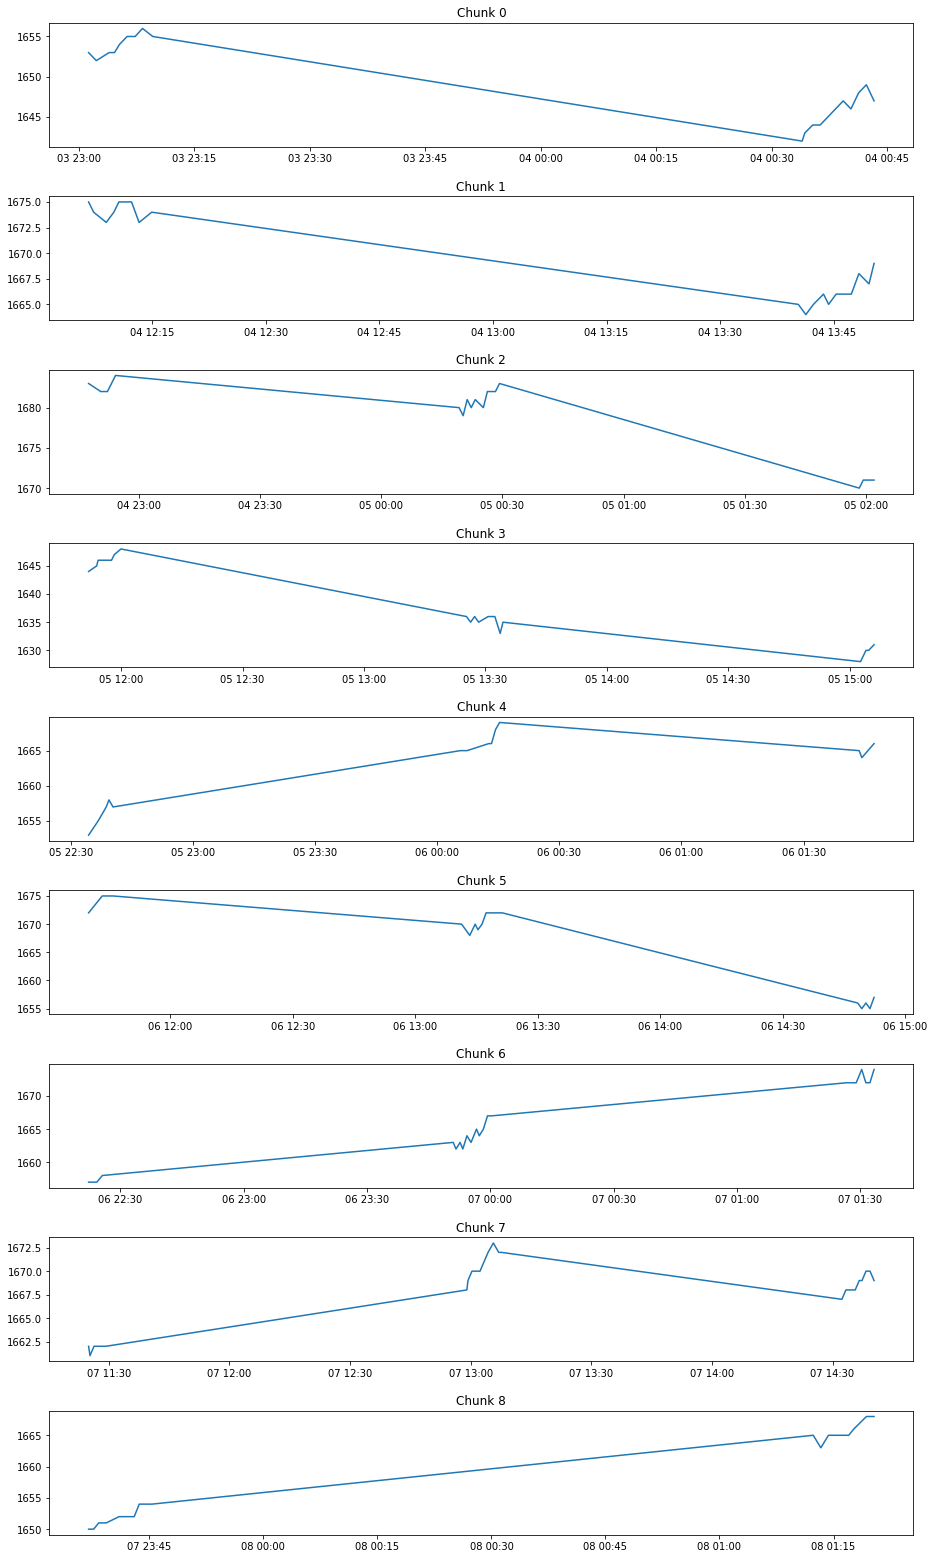

In [171]:
#[i for i in range(0,len(values[0]))]
#for i in range(0,2):
    #plt.plot(chunks[i], values[i])
    # plot something
fig, axs = plt.subplots(9, 1, figsize=(15, 15) )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
for i, ax in enumerate(axs.flat):
    ax.plot(chunks[i], values[i])
    ax.set_title(f'Chunk {i}')

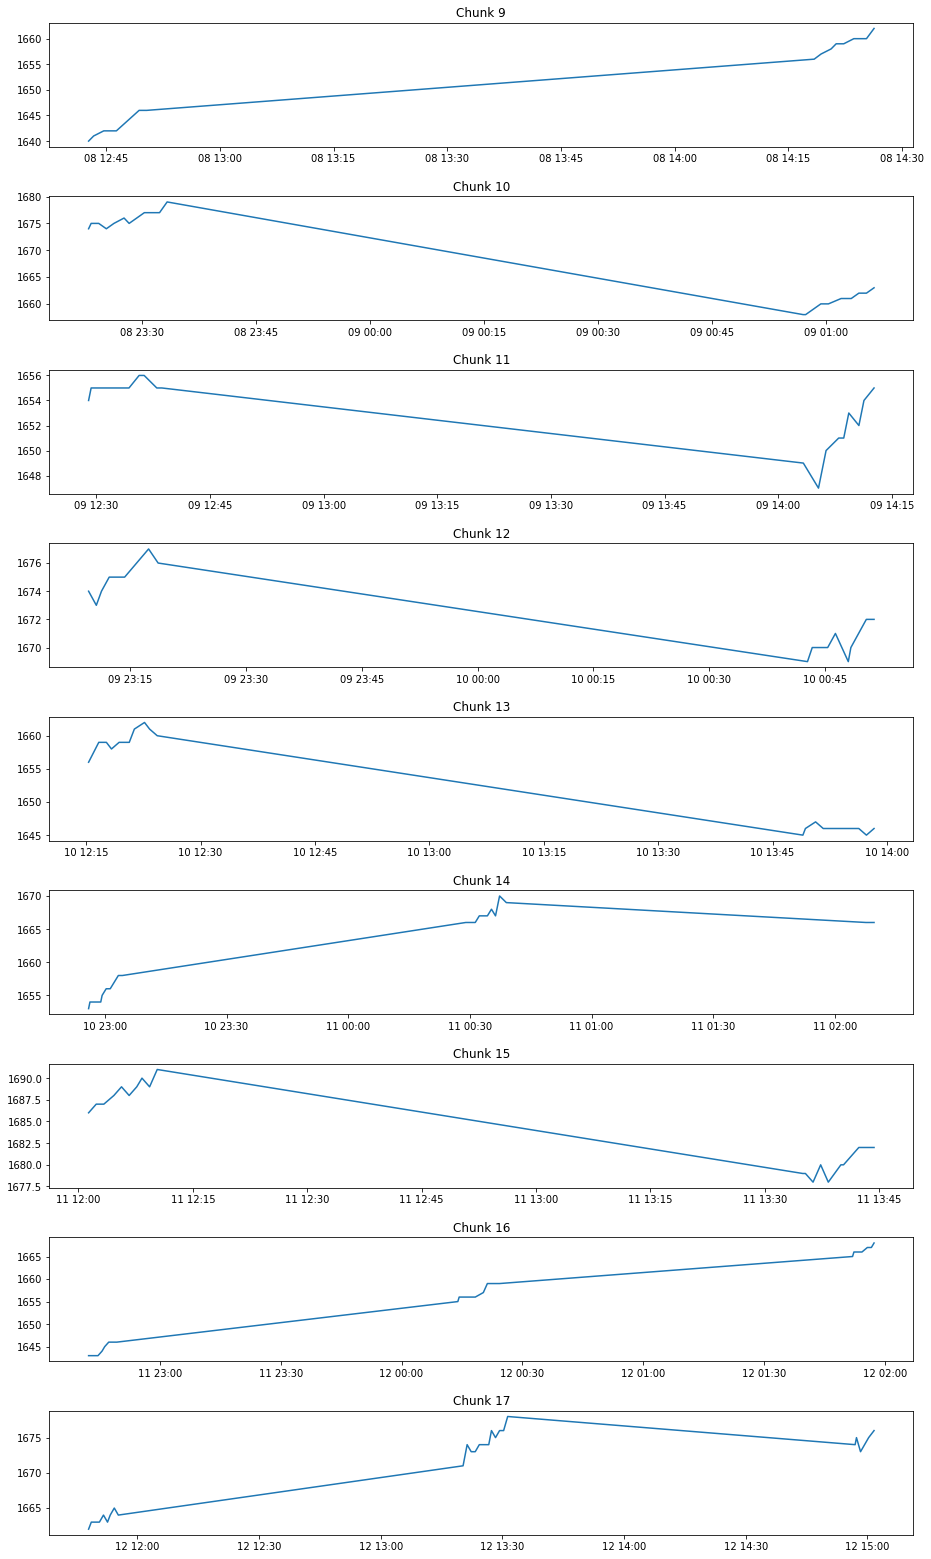

In [172]:
# plot something
fig, axs = plt.subplots(9, 1, figsize=(15, 15) )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
for i, ax in enumerate(axs.flat):
    i+=9
    ax.plot(chunks[i], values[i])
    ax.set_title(f'Chunk {i}')

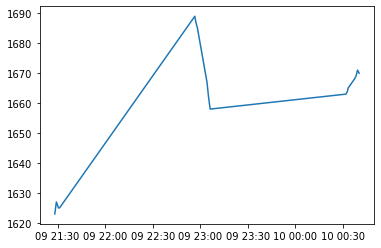

In [173]:
plt.plot(chunks[251], values[251])

## Obtain the timestamp in the middle of each chunk and get the distance between middle points of each chunk

In [174]:
len(chunks)

520

In [183]:
average_timestamps = [chunk[int(len(chunk)/2)] for chunk in chunks]
before_time = None

for average_timestamp in average_timestamps:
    if before_time == None:
        before_time = average_timestamp
        continue
    delta = average_timestamp - before_time
    if delta > timedelta(hours = 10):
        
        index = df.loc[df.time_received == average_timestamp].index[0]
        print("-" * 50)
        print("Tiempo Anterior: " + str(before_time))
        print("Tiempo Actual: " + str(time))
        print("Índice del timepo actual: " + str(index))
        print("Delta: " + str(delta))
        print("-" * 50 + "\n")
    
    before_time = average_timestamp

--------------------------------------------------
Tiempo Anterior: 2020-09-04 00:34:18
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 29
Delta: 0 days 13:07:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-09-04 13:41:18
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 49
Delta: 0 days 10:42:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-09-05 00:23:18
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 68
Delta: 0 days 13:05:01
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-09-05 13:28:19
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 85
Delta: 0 days 10:39:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-09-06 00:07:19
Tiem

--------------------------------------------------
Tiempo Anterior: 2020-11-05 12:11:52
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 2599
Delta: 0 days 10:43:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-11-05 22:54:52
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 2618
Delta: 0 days 13:06:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-11-06 12:00:52
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 2640
Delta: 0 days 12:04:39
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-11-07 00:05:31
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 2662
Delta: 0 days 11:42:19
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2020-11-07 11:47

--------------------------------------------------
Tiempo Anterior: 2021-01-06 23:49:35
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 4980
Delta: 0 days 12:55:59
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-01-07 12:45:34
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 4991
Delta: 0 days 10:47:20
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-01-07 23:32:54
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 5003
Delta: 0 days 12:59:19
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-01-08 12:32:13
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 5022
Delta: 0 days 23:45:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-01-09 12:17

--------------------------------------------------
Tiempo Anterior: 2021-03-15 23:06:37
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 7398
Delta: 0 days 13:07:40
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-03-16 12:14:17
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 7404
Delta: 0 days 10:37:20
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-03-16 22:51:37
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 7411
Delta: 0 days 13:09:39
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-03-17 12:01:16
Tiempo Actual: 2021-05-25 10:55:19
Índice del timepo actual: 7419
Delta: 0 days 10:38:00
--------------------------------------------------

--------------------------------------------------
Tiempo Anterior: 2021-03-17 22:39

## Obtain the average of values in each chunk

In [184]:
average_values = [sum(value_chunk)/len(value_chunk) for value_chunk in values]


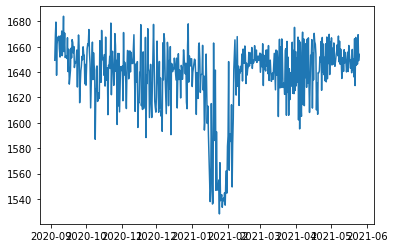

In [185]:
plt.plot(average_timestamps, average_values)

## Hasta el índice 549, temenos unos datos espaciados entre 9 y 14 horas, podemos modificar el modelo para espaciarlos 12 horas

In [186]:
first_chunk = average_timestamps[0]
print(first_chunk)
first_chunk + timedelta(hours = 10)

2020-09-04 00:34:18


Timestamp('2020-09-04 10:34:18')

In [187]:
first_chunk = average_timestamps[0]
new_timestamps = [first_chunk]
for i in range(0,len(average_timestamps)-1+8):
    new_timestamps.append(new_timestamps[i] + timedelta(hours = 12))
    
print(new_timestamps)

[Timestamp('2020-09-04 00:34:18'), Timestamp('2020-09-04 12:34:18'), Timestamp('2020-09-05 00:34:18'), Timestamp('2020-09-05 12:34:18'), Timestamp('2020-09-06 00:34:18'), Timestamp('2020-09-06 12:34:18'), Timestamp('2020-09-07 00:34:18'), Timestamp('2020-09-07 12:34:18'), Timestamp('2020-09-08 00:34:18'), Timestamp('2020-09-08 12:34:18'), Timestamp('2020-09-09 00:34:18'), Timestamp('2020-09-09 12:34:18'), Timestamp('2020-09-10 00:34:18'), Timestamp('2020-09-10 12:34:18'), Timestamp('2020-09-11 00:34:18'), Timestamp('2020-09-11 12:34:18'), Timestamp('2020-09-12 00:34:18'), Timestamp('2020-09-12 12:34:18'), Timestamp('2020-09-13 00:34:18'), Timestamp('2020-09-13 12:34:18'), Timestamp('2020-09-14 00:34:18'), Timestamp('2020-09-14 12:34:18'), Timestamp('2020-09-15 00:34:18'), Timestamp('2020-09-15 12:34:18'), Timestamp('2020-09-16 00:34:18'), Timestamp('2020-09-16 12:34:18'), Timestamp('2020-09-17 00:34:18'), Timestamp('2020-09-17 12:34:18'), Timestamp('2020-09-18 00:34:18'), Timestamp('20

In [188]:
for i in range(0, len(average_timestamps)):
    delta = abs(average_timestamps[i] - new_timestamps[i])
    if delta > timedelta(hours = 11):
 
        print("Índice: " + str(i))
        print(delta)

Índice: 26
0 days 13:13:19
Índice: 27
0 days 11:55:20
Índice: 28
0 days 13:00:00
Índice: 29
0 days 11:42:00
Índice: 30
0 days 12:48:00
Índice: 31
0 days 11:28:00
Índice: 32
0 days 12:33:01
Índice: 33
0 days 11:15:01
Índice: 34
0 days 12:23:01
Índice: 35
0 days 12:27:01
Índice: 36
0 days 12:09:01
Índice: 37
0 days 12:11:59
Índice: 38
0 days 13:18:39
Índice: 39
0 days 11:58:59
Índice: 40
0 days 13:03:59
Índice: 41
0 days 11:49:39
Índice: 42
0 days 12:51:19
Índice: 43
0 days 11:38:00
Índice: 44
0 days 12:41:00
Índice: 45
0 days 11:24:00
Índice: 46
0 days 12:29:00
Índice: 47
0 days 12:36:00
Índice: 48
0 days 12:17:01
Índice: 49
0 days 12:22:01
Índice: 50
0 days 12:03:18
Índice: 51
0 days 12:06:38
Índice: 52
0 days 11:45:58
Índice: 53
0 days 11:56:58
Índice: 54
0 days 23:44:16
Índice: 55
1 days 00:51:16
Índice: 56
0 days 23:27:55
Índice: 57
1 days 00:34:55
Índice: 58
0 days 23:17:55
Índice: 59
1 days 00:24:55
Índice: 60
1 days 00:30:15
Índice: 61
1 days 01:36:33
Índice: 62
1 days 00:16:13
Í

## Probelmatic indexes, with holes bigger than 12h

In [189]:
positions = [26, 54, 238, 250, 310, 375, 435]

In [190]:
combined_lst = average_values
for position in positions:
    combined_lst = combined_lst[:position] + [4096] + combined_lst[position:]


In [191]:
for i in combined_lst:
    print(i)

1649.35
1669.4736842105262
1679.45
1637.5263157894738
1662.0
1667.6
1665.2380952380952
1668.3478260869565
1658.4117647058824
1651.875
1668.4782608695652
1653.142857142857
1672.388888888889
1653.0
1662.1666666666667
1684.047619047619
1656.24
1670.8148148148148
1651.5
1652.6818181818182
1651.7916666666667
1650.7272727272727
1667.095238095238
1640.4285714285713
1658.0526315789473
1630.5454545454545
4096
1641.4
1658.842105263158
1651.2727272727273
1665.6
1663.35
1655.04
1660.1304347826087
1643.608695652174
1647.65
1647.2
1649.6363636363637
1657.3809523809523
1628.2727272727273
1653.7727272727273
1669.2727272727273
1660.9130434782608
1615.88
1629.409090909091
1641.0
1644.3846153846155
1652.4347826086957
1649.7222222222222
1659.952380952381
1654.05
1653.4761904761904
1630.7619047619048
1646.0714285714287
4096
1629.7142857142858
1658.3333333333333
1662.388888888889
1661.0
1673.576923076923
1656.2608695652175
1646.7368421052631
1611.7727272727273
1632.2727272727273
1647.5
1663.6363636363637
16

In [192]:
def knn_mean(ts, n):
    out = np.copy(ts)
    sumat = 0
    for i, val in enumerate(ts):
        if val==4096: #if np.isnan(val):
            for j in range(i-int(n/2),i+int(n/2)+1):
                if j==i:
                    continue
                sumat += out[j]
            
            out[i]= sumat/(n)
            sumat = 0

            
    return out

new_average_values =  knn_mean(np.array(combined_lst), 8)

enter
enter
enter
enter
enter
enter
enter


In [194]:
for position in positions:
    print(new_average_values[position])
    print(new_average_values[position-3:position+4])

1651.6545910230122
[1640.42857143 1658.05263158 1630.54545455 1651.65459102 1641.4
 1658.84210526 1651.27272727]
1649.4745039682539
[1653.47619048 1630.76190476 1646.07142857 1649.47450397 1629.71428571
 1658.33333333 1662.38888889]
1645.334102443609
[1644.84210526 1650.5        1650.5        1645.33410244 1628.625
 1639.8        1650.21428571]
1641.5563590820943
[1619.28571429 1660.58823529 1663.         1641.55635908 1650.07692308
 1624.         1637.5       ]
1619.5033004413885
[1582.92       1603.90909091 1641.84       1619.50330044 1655.04545455
 1665.42857143 1635.52380952]
1641.0332863408523
[1649.42857143 1640.42105263 1632.73684211 1641.03328634 1637.5
 1639.26315789 1634.33333333]
1645.7027777777778
[1661.5        1635.66666667 1662.5        1645.70277778 1628.
 1666.         1631.4       ]


## Hay dos saltos de 12 horas en la posicion 238

In [195]:
position = 238
combined_lst = new_average_values[:position].tolist() + [4096] + new_average_values[position:].tolist()

In [196]:
new_average_values =  knn_mean(np.array(combined_lst), 8)

enter


## Now we have equidistant Time Series, with a separation of 6 hours 

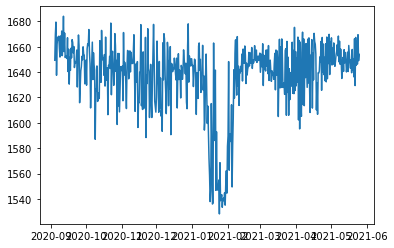

In [197]:
plt.plot(new_timestamps, new_average_values)